In [33]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
#Load the data
csv_file_path = 'GLT_ByMajorCity.csv'
data_csv = pd.read_csv(csv_file_path)

In [4]:
#show the summary of data
print(data_csv.head())

           dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01              28.101                          1.612  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  


In [5]:
# Convert the 'dt' column to the datetime type for proper date handling
data_csv['dt'] = pd.to_datetime(data_csv['dt'])

In [6]:
# Check for missing values in the dataset
missing_values = data_csv.isnull().sum()
print(missing_values)

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64


In [7]:
# Remove rows with missing temperature values as this data is crucial for our analysis
cleaned_data = data_csv.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

In [9]:
# Save the cleaned data to a new CSV file named 'MajorCities.csv'
cleaned_csv_file_path = 'MajorCities.csv'
cleaned_data.to_csv(cleaned_csv_file_path, index=False)

In [10]:
# Output the path to the cleaned CSV file and display any remaining missing values
print(f"Cleaned data saved to {cleaned_csv_file_path}")
print(cleaned_data.isnull().sum())

Cleaned data saved to MajorCities.csv
dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64


In [21]:
# Describe the data to see the statistical summary of numerical columns
statistical_summary = cleaned_data.describe()

# Count the number of unique values in 'City' and 'Country' to check the diversity of the dataset
unique_cities = cleaned_data['City'].nunique()
unique_countries = cleaned_data['Country'].nunique()

statistical_summary, unique_cities, unique_countries

(       AverageTemperature  AverageTemperatureUncertainty
 count       228175.000000                  228175.000000
 mean            18.125969                       0.969343
 std             10.024800                       0.979644
 min            -26.772000                       0.040000
 25%             12.710000                       0.340000
 50%             20.428000                       0.592000
 75%             25.918000                       1.320000
 max             38.283000                      14.037000,
 100,
 49)

/var/folders/2w/njds6fr12r9dlvp34dksry0w0000gn/T/ipykernel_11414/765902847.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_data['AverageTemperature'], shade=True)
/Users/cihanelv/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cihanelv/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


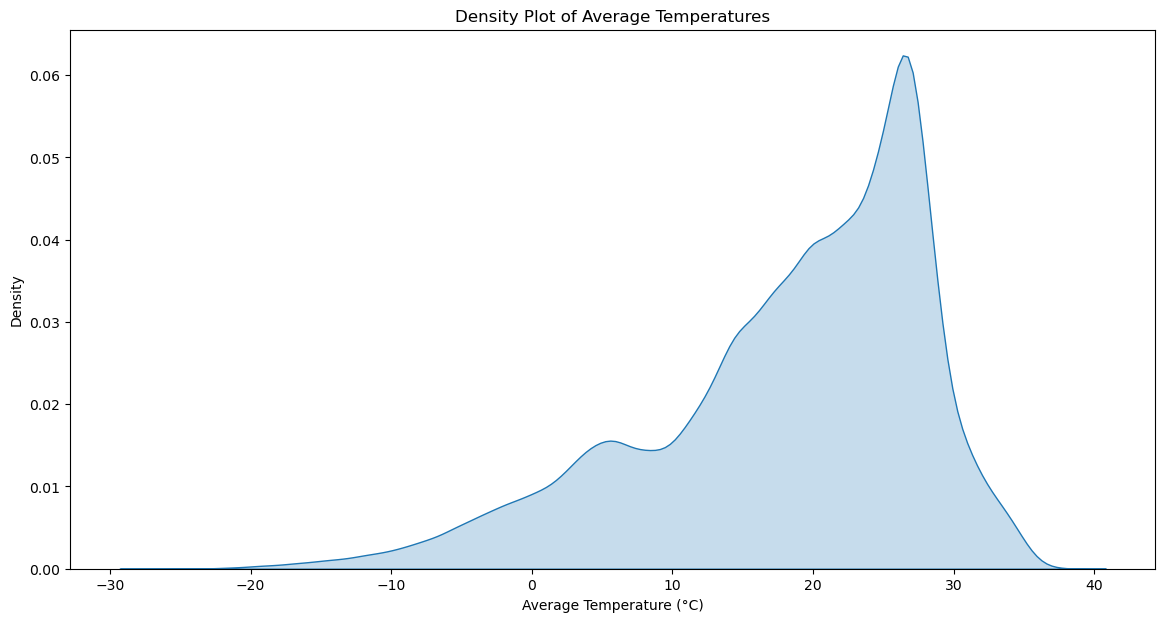

In [25]:
# Density plot for AverageTemperature using cleaned_data
plt.figure(figsize=(14, 7))
sns.kdeplot(cleaned_data['AverageTemperature'], shade=True)
plt.title('Density Plot of Average Temperatures')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Density')
plt.show()


/var/folders/2w/njds6fr12r9dlvp34dksry0w0000gn/T/ipykernel_11414/477423182.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_data['AverageTemperatureUncertainty'], shade=True)
/Users/cihanelv/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cihanelv/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


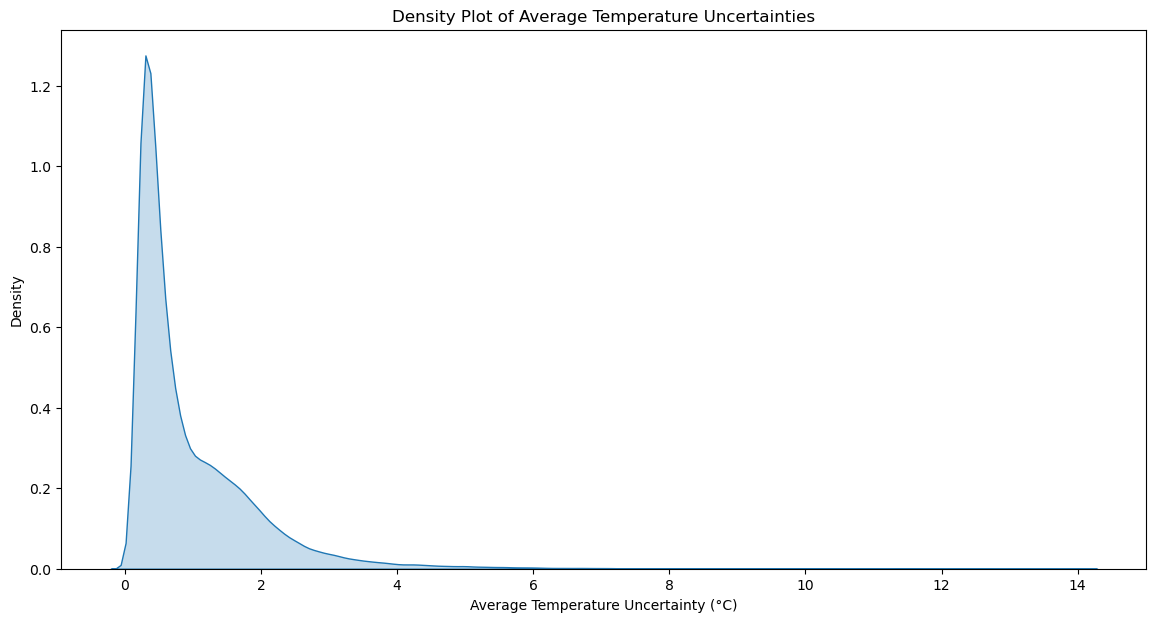

In [26]:
# Density plot for AverageTemperatureUncertainty using cleaned_data
plt.figure(figsize=(14, 7))
sns.kdeplot(cleaned_data['AverageTemperatureUncertainty'], shade=True)
plt.title('Density Plot of Average Temperature Uncertainties')
plt.xlabel('Average Temperature Uncertainty (°C)')
plt.ylabel('Density')
plt.show()

In [29]:
# Filter the data for the years 1920 - 1970
filtered_data = cleaned_data[(cleaned_data['dt'] >= '1920-01-01') & (cleaned_data['dt'] <= '1970-12-31')]

# Calculate the temperature range for each city within this period
temperature_range = filtered_data.groupby('City').agg(
    max_temperature=('AverageTemperature', 'max'),
    min_temperature=('AverageTemperature', 'min')
)
temperature_range['temp_range'] = temperature_range['max_temperature'] - temperature_range['min_temperature']

# Sort the cities by temperature range in descending order
sorted_cities_by_range = temperature_range.sort_values('temp_range', ascending=False).reset_index()

# Display the top 10 cities with the largest temperature range
sorted_cities_by_range.head(10)

,City,max_temperature,min_temperature,temp_range
0,Harbin,25.732,-26.772,52.504
1,Changchun,25.714,-23.272,48.986
2,Shenyang,25.728,-17.035,42.763
3,Moscow,22.336,-19.376,41.712
4,Montreal,23.059,-17.961,41.020
5,Kiev,24.418,-16.191,40.609
6,Toronto,23.181,-15.502,38.683
7,Taiyuan,24.490,-13.116,37.606
8,Saint Petersburg,19.826,-17.529,37.355
9,Tianjin,27.805,-8.017,35.822


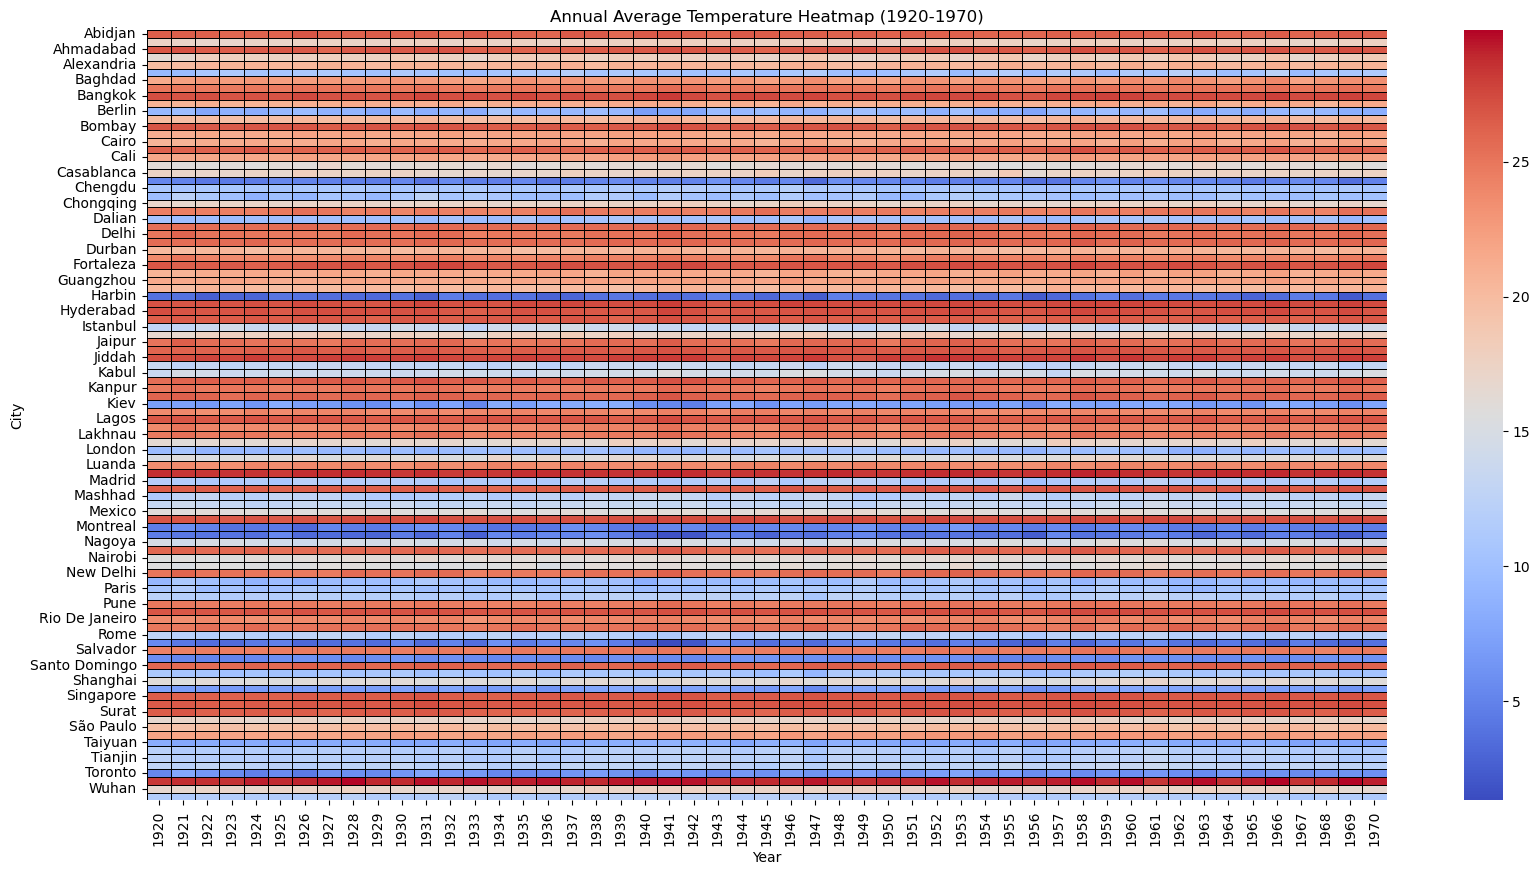

In [34]:
# Yıllık ortalama sıcaklıkları hesaplayın
annual_avg_temp = filtered_data.groupby(['City', filtered_data['dt'].dt.year])['AverageTemperature'].mean().reset_index(name='YearlyAvgTemp')

# Isı haritası için veriyi pivotlayın
heatmap_data = annual_avg_temp.pivot(index='City', columns='dt', values='YearlyAvgTemp')

# Isı haritasını çizin
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=.5, linecolor='black')
plt.title('Annual Average Temperature Heatmap (1920-1970)')
plt.xlabel('Year')
plt.ylabel('City')
plt.show()


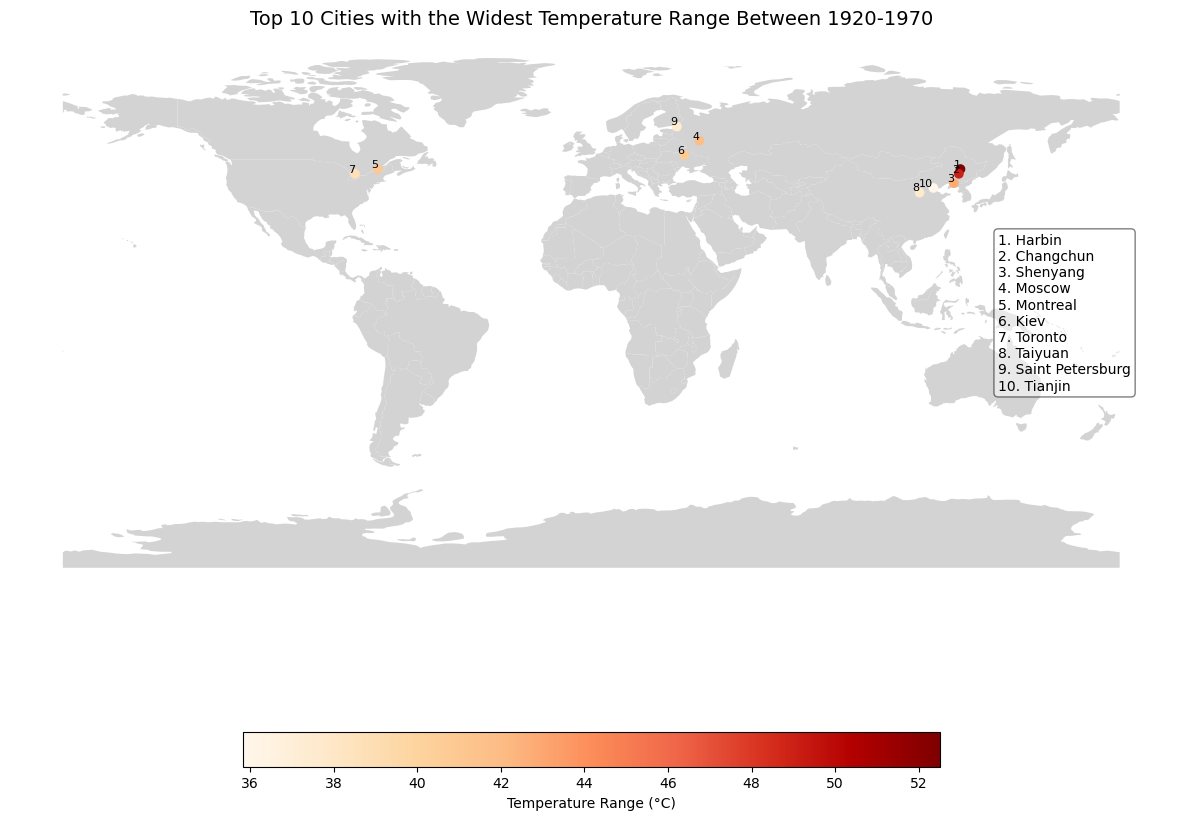

In [40]:
# Görseli daha kompakt hale getirelim ve açıklama tablosunu sağ orta kısma taşıyalım.

# Harita boyutunu azaltalım ve açıklama tablosunu haritanın üzerine gelmeyecek şekilde ayarlayalım
fig, ax = plt.subplots(1, 1, figsize=(15, 12))  # Boyutu biraz küçülttük
world.plot(ax=ax, color='lightgrey')

# Sıcaklık aralığını efsane olarak ekleme
top_cities_gdf.plot(ax=ax, column='temp_range', cmap='OrRd', legend=True,
                    legend_kwds={'label': "Temperature Range (°C)",
                                 'orientation': "horizontal",
                                 'shrink': 0.6})  # Efsaneyi biraz küçülttük

# Şehirler için numaraları kullanarak işaretleyelim ve bu numaraların hangi şehri temsil ettiğini bir yana yazalım
for idx, row in top_cities_gdf.iterrows():
    plt.text(row.geometry.x, row.geometry.y, str(idx+1), fontsize=8, ha='right', va='bottom')

# Şehirlerin listesini ve numaralarını haritanın sağ orta kısmında gösterelim
city_labels = [f"{idx+1}. {row['City']}" for idx, row in top_cities_gdf.iterrows()]
city_labels_str = "\n".join(city_labels)
plt.text(0.85, 0.5, city_labels_str, transform=ax.transAxes, fontsize=10,
         verticalalignment='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.5))

# Grafik başlığını ve diğer detayları ekleyelim
plt.title('Top 10 Cities with the Widest Temperature Range Between 1920-1970', fontsize=14)
ax.set_axis_off()  # Koordinat ekseni yazılarını kaldıralım
plt.show()